# HDDT Quakers (tables) #

## An analysis of 593 Quakers, their relationships and CEDA memberships ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
import numpy as np
import csv
import seaborn as sns

In [3]:
quakers = pd.read_csv ('vw_1_quaker_all_202108191909.csv')
quakers['birth_year'] = quakers['death_year'].fillna(0).astype(np.int64)
quakers['death_year'] = quakers['death_year'].fillna(0).astype(np.int64)

quaker_relationships = pd.read_csv ('vw_5_person1_person2_202107121948.csv')
quaker_distant = pd.read_csv ('vw_5_person_person_rel1_202108192002.csv')
quaker_close = pd.read_csv ('vw_5_person_person_rel2_202108192006.csv')
quaker_immediate = pd.read_csv ('vw_5_person_person_rel3_202108192007.csv')

quaker_ceda = pd.read_csv ('vw_4_quakers_ceda_202109021829.csv')
quaker_aps = pd.read_csv ('vw_4_ceda_aps_quakers_202109021715.csv')
quaker_esl = pd.read_csv('vw_4_ceda_esl_quakers_202109021722.csv')
quaker_asl = pd.read_csv('vw_4_ceda_asl_quakers_202109021720.csv')
quaker_ai = pd.read_csv('vw_4_ceda_ai_quakers_202109021727.csv')


# Quakers are well connected by familial relationships #

<img src="quaker_relationships.png">

# Quakers occupy roughly 50% of the APS (and 100% of the QCA) #

<img src="quaker_bigraph.png">

# List out all Quakers in the database #

## Note - 'confirmed' 1 = positive identification, 0 = probable identification ##

In [68]:

quakers

,family_name,first_names,birth_year,death_year,religion,confirmed,notes
0,Wood,William Spicer,1902,1902,Quaker,0,Multiple possibilities
1,Wilson,William,1868,1868,Quaker,0,Multiple possibilities
2,Wilson,James,0,0,Quaker,0,Multiple possibilities
3,Wakefield,E T,0,0,Quaker,1,"Edward T. Wakefield (1821-1896), of Portadown,..."
4,Ross,John,0,0,Quaker,0,"Possibly John Ross (1798-1863), of Chatteris, ..."
...,...,...,...,...,...,...,...
588,Wilson,Joshua,0,0,Quaker,1,"Joshua Wilson (1806-1877), merchant, ship and ..."
589,Woodhead,F,0,0,Quaker,1,"Firth Woodhead (1811-1874), grocer and tea dea..."
590,Woolston,W,0,0,Quaker,1,"William Woolston (1817-1898), of Wellingborough"
591,Wright,Francis,0,0,Quaker,1,"Francis Wright (1774-1850), tanner, chemist, a..."


# List out all Quaker Relationships by type #

## Note 'relationship type' 3 = immediate relation, 2 = close relation, 3 = distant relation ##

In [69]:
quaker_relationships

,Source,Target,relationship_type_id
0,William Aldam,x Fox,1
1,William Jun Aldam,x Fox,1
2,Frederick Alexander,R D Alexander,1
3,G W Alexander,R D Alexander,1
4,Henry Alexander,R D Alexander,1
...,...,...,...
2094,Alfred Waterhouse,R Waterhouse,3
2095,Mary Waterhouse,Paul Bevan,3
2096,Lucy Westcombe,Thomas Westcombe,3
2097,Benjamin Wheeler,Samuel Wheeler,3


# Pie chart of all Quaker relationships #

## Note e.g. 3 contains a few Quakers with many relationships, 1 contains many Quakers with few relationships ##

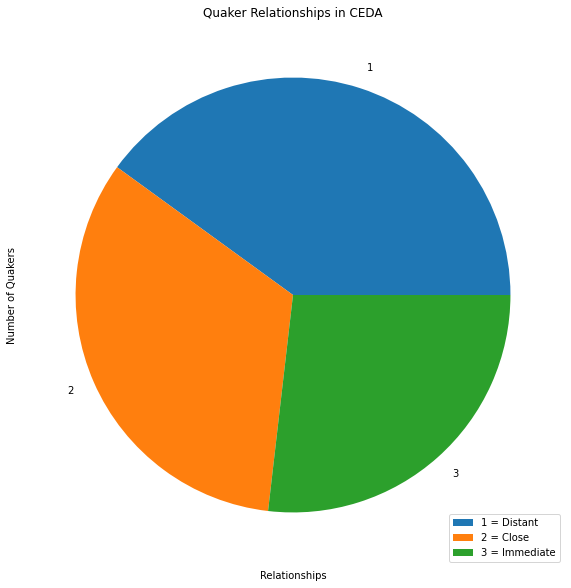

In [70]:
quaker_relationships.groupby('relationship_type_id')['Source'].nunique().plot(kind='pie')
plt.title ("Quaker Relationships in CEDA")
plt.xlabel ("Relationships")
plt.ylabel ("Number of Quakers")
plt.legend(["1 = Distant", "2 = Close", "3 = Immediate"], loc ="lower right")
plt.show()

In [71]:
quaker_immediate 

,Source,Target,relationship_type_id
0,Arthur Albright,John M Albright,3
1,Arthur Albright,Rachel Albright,3
2,Arthur Albright,William Albright,3
3,Rachel Albright,John M Albright,3
4,Rachel Albright,William Albright,3
...,...,...,...
244,Alfred Waterhouse,R Waterhouse,3
245,Mary Waterhouse,Paul Bevan,3
246,Lucy Westcombe,Thomas Westcombe,3
247,Benjamin Wheeler,Samuel Wheeler,3


In [72]:
quaker_close

,Source,Target,relationship_type_id
0,R D Alexander,Christopher Bowley,2
1,R D Alexander,Robert Charleton,2
2,R D Alexander,Frederick H Fox,2
3,R D Alexander,Thomas Maw,2
4,R D Alexander,William Norton,2
...,...,...,...
517,W Whiting,John Whiting,2
518,Isaac Wilson,S Braithwaite,2
519,Isaac Wilson,John Jowett,2
520,Isaac Wilson,John E Wilson,2


In [73]:
quaker_distant

,Source,Target,relationship_type_id
0,William Aldam,x Fox,1
1,William Jun Aldam,x Fox,1
2,Frederick Alexander,R D Alexander,1
3,G W Alexander,R D Alexander,1
4,Henry Alexander,R D Alexander,1
...,...,...,...
1323,William Wilson,Barnard Dickinson,1
1324,William Wilson,Frederick Fryer,1
1325,William Wilson,Benjamin Jowett (2),1
1326,William Wilson,John Pease,1


# List out all Quaker CEDA memberships #

In [74]:
quaker_ceda

,Source,Target,person_ceda_first_year,person_ceda_last_year,religion_name
0,William Spicer Wood,APS,1864,1867,Quaker
1,William Spicer Wood,ASL,1863,1871,Quaker
2,William Spicer Wood,AI,1863,1871,Quaker
3,William Wilson,APS,1838,1865,Quaker
4,William Wilson,ASL,1865,1866,Quaker
...,...,...,...,...,...
639,Joshua Wilson,APS,1860,1860,Quaker
640,F Woodhead,APS,1861,1862,Quaker
641,W Woolston,APS,1861,1861,Quaker
642,Francis Wright,APS,1838,1838,Quaker


# Pie chart Quaker CEDA memberships #

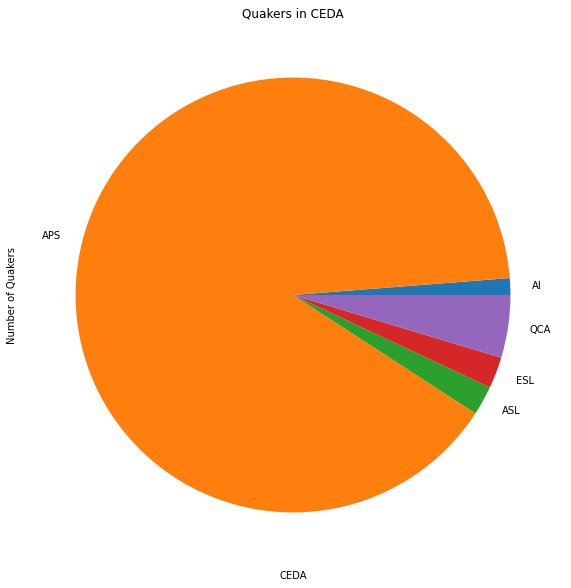

In [75]:
quaker_ceda.groupby('Target')['Source'].nunique().plot(kind='pie')
plt.title ("Quakers in CEDA")
plt.xlabel ("CEDA")
plt.ylabel ("Number of Quakers")
plt.show()

# Show Quaker 'joiners' and 'leavers' of the CEDA #

## (Predominantly the APS) ##

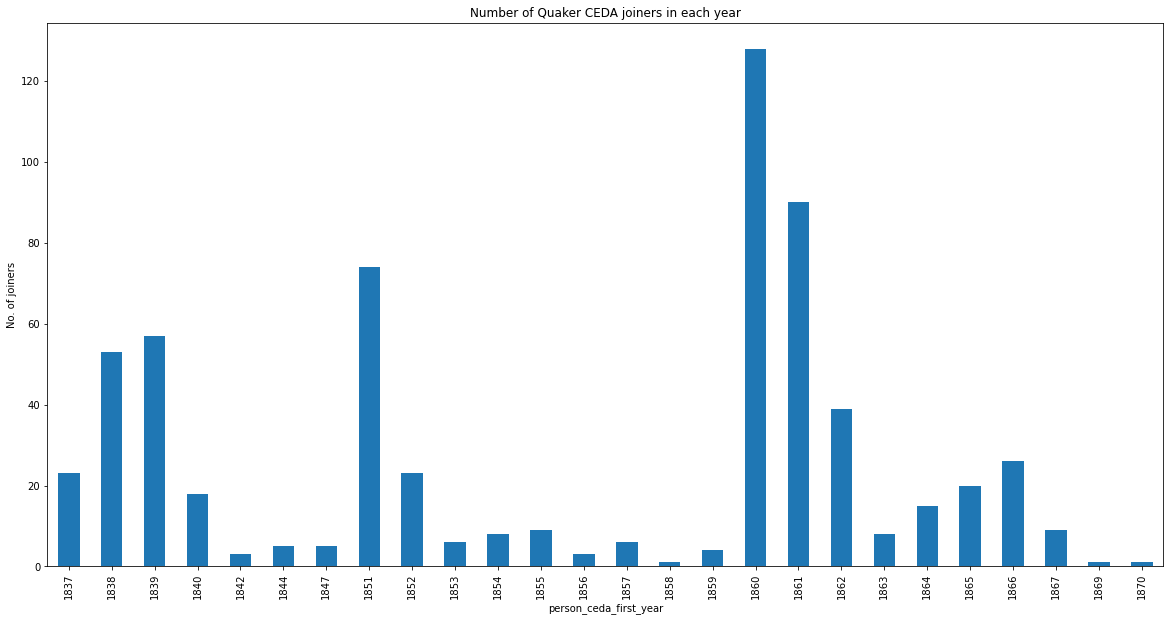

In [90]:
quaker_ceda.groupby('person_ceda_first_year')['Source'].nunique().plot(kind='bar')
plt.title ("Number of Quaker CEDA joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

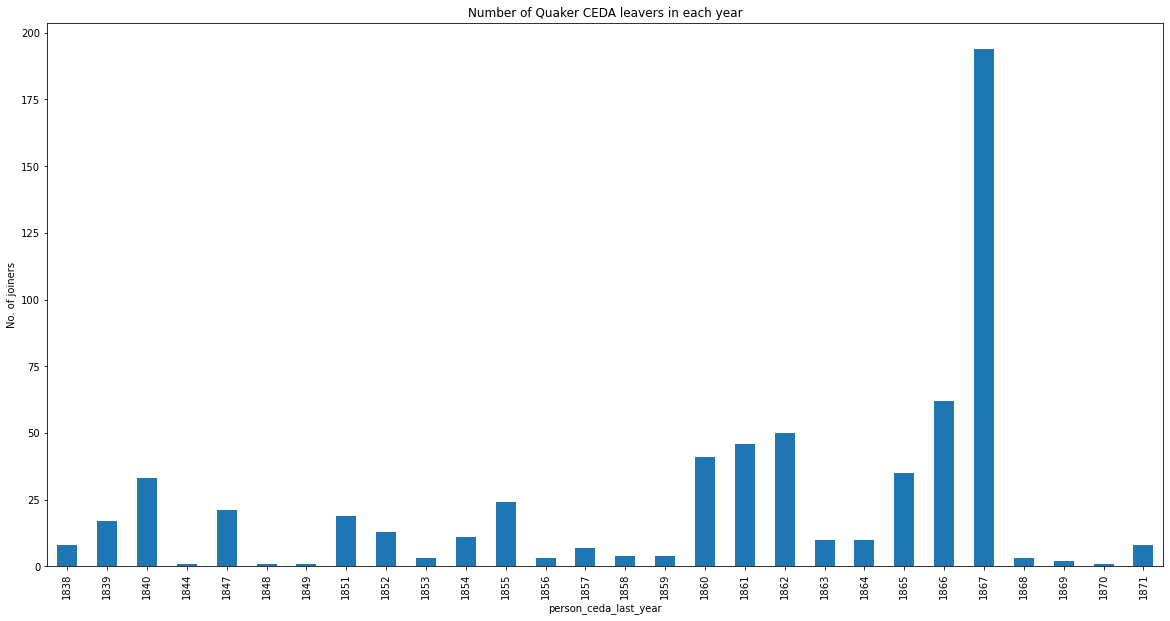

In [91]:
quaker_ceda.groupby('person_ceda_last_year')['Source'].nunique().plot(kind='bar')
plt.title ("Number of Quaker CEDA leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show the Quaker members of the APS #

## Note Quakers make up roughly half of the members over all years ##

In [78]:
quaker_aps

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Aldam,1813.0,1890.0,1838,1848,1
1,James Bell,1818.0,1872.0,1847,1862,1
2,Henry Christy,1810.0,1865.0,1840,1865,1
3,William Clay,1791.0,1869.0,1839,1868,1
4,William Spicer Wood,NaN,1902.0,1864,1867,1
...,...,...,...,...,...,...
572,Joshua Wilson,NaN,NaN,1860,1860,1
573,F Woodhead,NaN,NaN,1861,1862,1
574,W Woolston,NaN,NaN,1861,1861,1
575,Francis Wright,NaN,NaN,1838,1838,1


# Pie chart Quaker 'joiners' and 'leavers' of the APS #

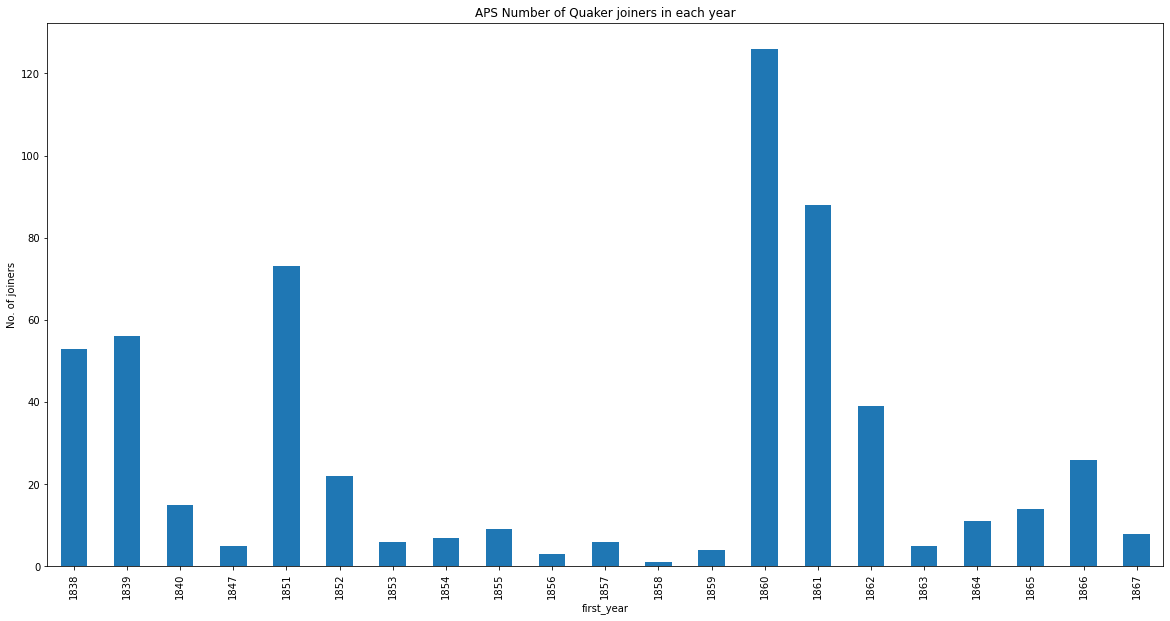

In [79]:
quaker_aps.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

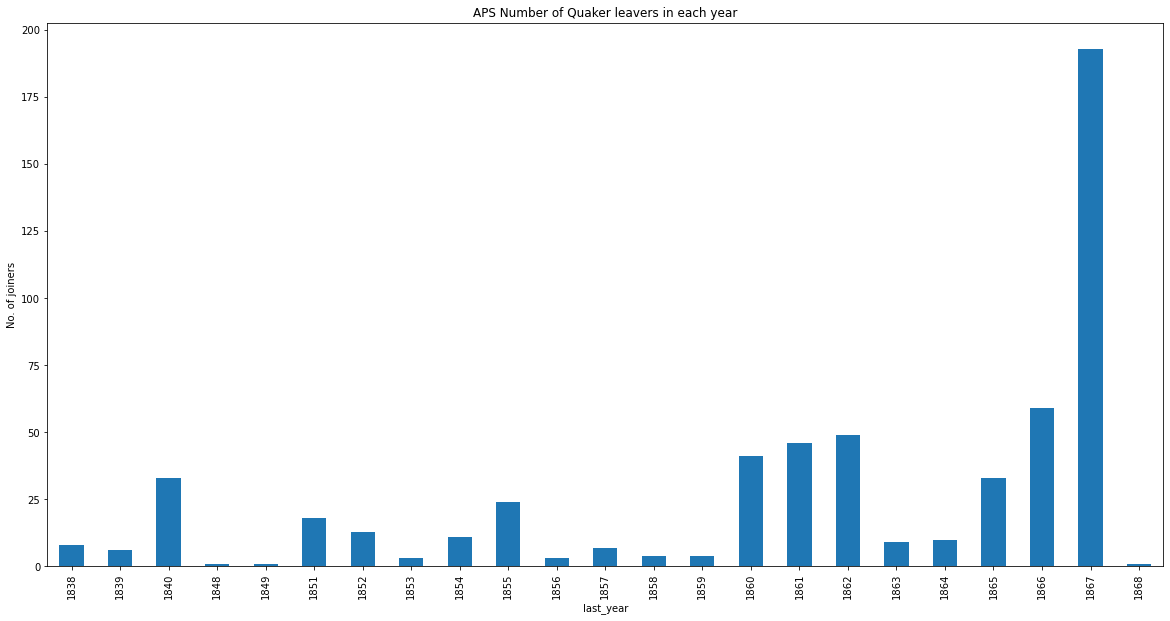

In [80]:
quaker_aps.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("APS Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show Quaker members of the ESL #

In [4]:
quaker_esl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,William Aldam,1813.0,1890.0,1844,1848,1
1,Edward Backhouse,1808.0,1879.0,1870,1871,1
2,James (1) Backhouse,1794.0,1869.0,1869,1869,1
3,James Bell,1818.0,1872.0,1852,1862,1
4,Henry Christy,1810.0,1865.0,1854,1865,1
5,William Clay,1791.0,1869.0,1861,1868,1
6,x Collier,NaN,NaN,1844,1844,1
7,David Dale,1829.0,1906.0,1860,1863,1
8,Robert Nicholas Fowler,1828.0,1891.0,1851,1871,1
9,William Fowler,NaN,NaN,1851,1851,1


# Show Quaker 'joiners' and 'leavers' of the ESL #

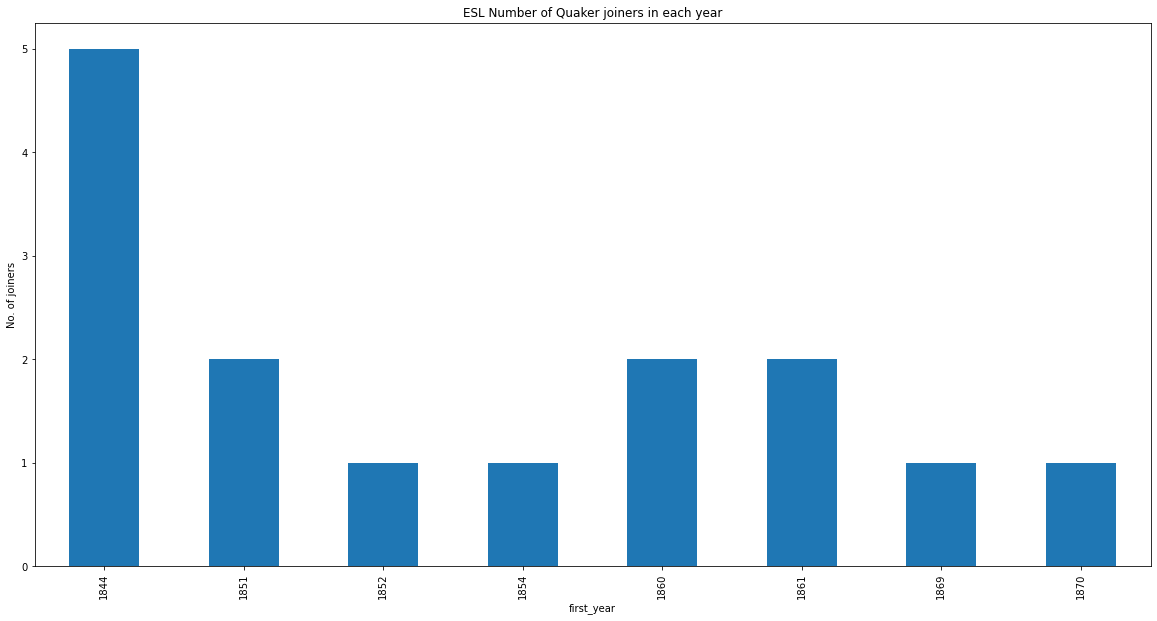

In [5]:
quaker_esl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("ESL Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

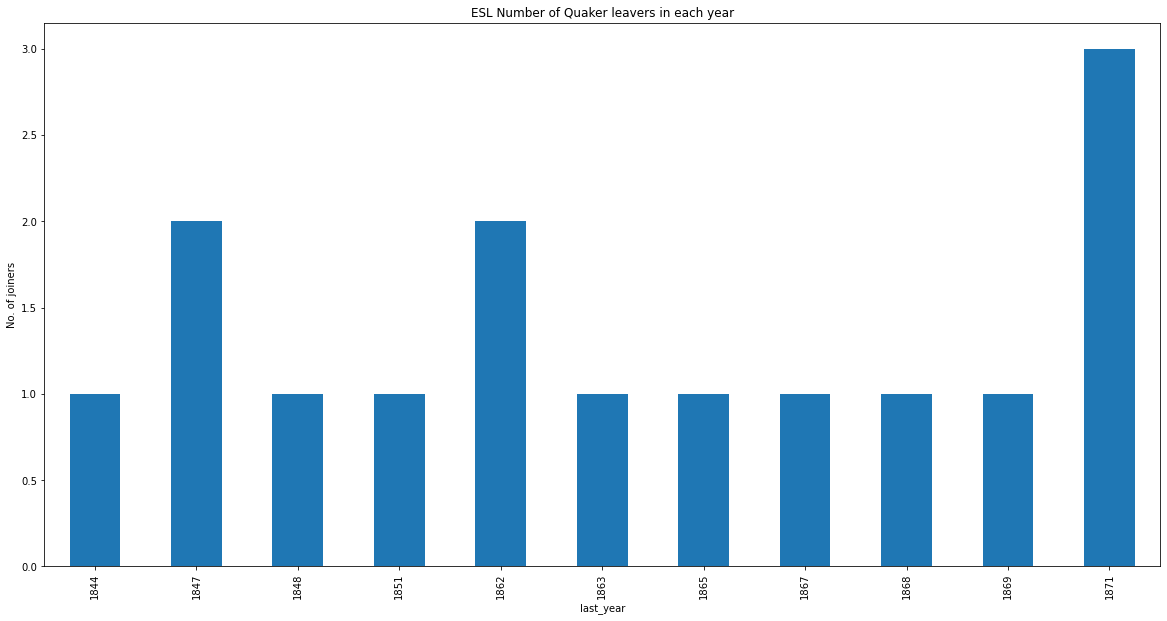

In [6]:
quaker_esl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("ESL Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show Quaker members of the ASL #

In [84]:
quaker_asl

,Name,birth_year,death_year,first_year,last_year,religion_id
0,S Stafford Allen,1840.0,1870.0,1863,1870,1
1,Antonio Brady,1811.0,1881.0,1864,1871,1
2,William Bull,1828.0,1902.0,1867,1871,1
3,Charles Buxton,1823.0,1871.0,1864,1866,1
4,Henry Crowley,NaN,1887.0,1864,1871,1
5,James T J Doyle,NaN,NaN,1865,1868,1
6,George Stacey Gibson,1818.0,1883.0,1864,1866,1
7,William Holmes,NaN,NaN,1865,1869,1
8,Jonathan Hutchinson,1828.0,1913.0,1863,1871,1
9,J Robinson,NaN,NaN,1865,1865,1


# Show quaker 'joiners' and 'leavers' of the ASL #

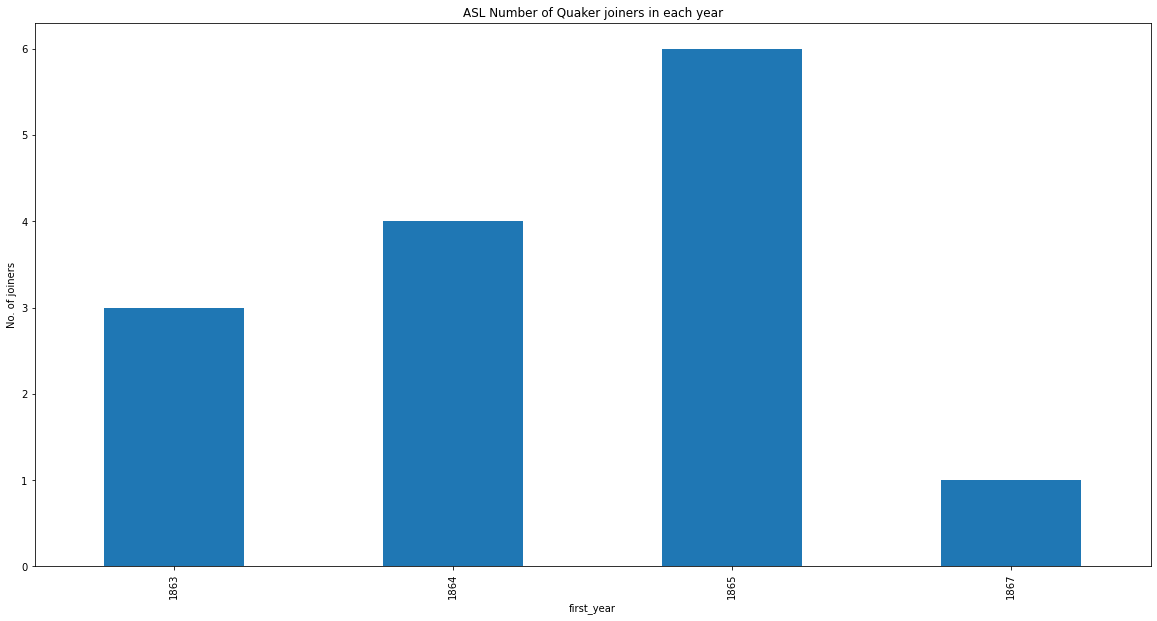

In [85]:
quaker_asl.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("ASL Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

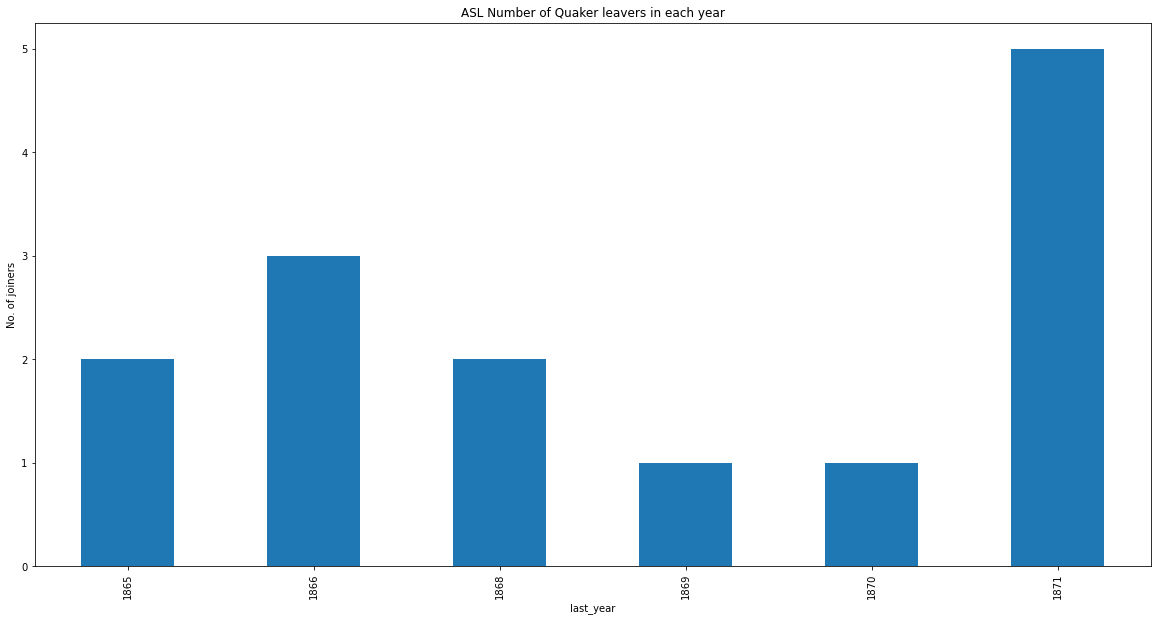

In [86]:
quaker_asl.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("ASL Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# Show Quaker members of the AI #

In [87]:
quaker_ai

,Name,birth_year,death_year,first_year,last_year,religion_id
0,Edward Backhouse,1808.0,1879.0,1870,1871,1
1,Antonio Brady,1811.0,1881.0,1864,1871,1
2,William Bull,1828.0,1902.0,1867,1871,1
3,Henry Crowley,NaN,1887.0,1864,1871,1
4,Robert Nicholas Fowler,1828.0,1891.0,1851,1871,1
5,Charles Henry Fox,NaN,NaN,1861,1871,1
6,Jonathan Hutchinson,1828.0,1913.0,1863,1871,1
7,William Spicer Wood,NaN,1902.0,1863,1871,1


# show Quaker 'joiners' and 'leavers' of the AI #

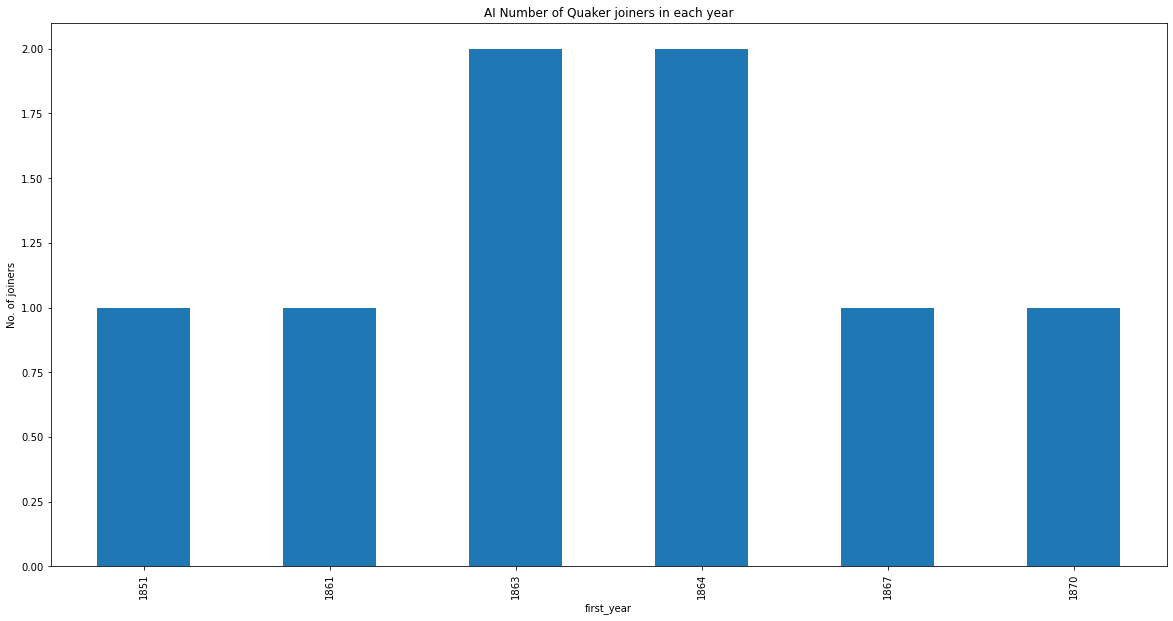

In [88]:
quaker_ai.groupby('first_year')['Name'].nunique().plot(kind='bar')
plt.title ("AI Number of Quaker joiners in each year")
plt.ylabel ("No. of joiners")
plt.show()

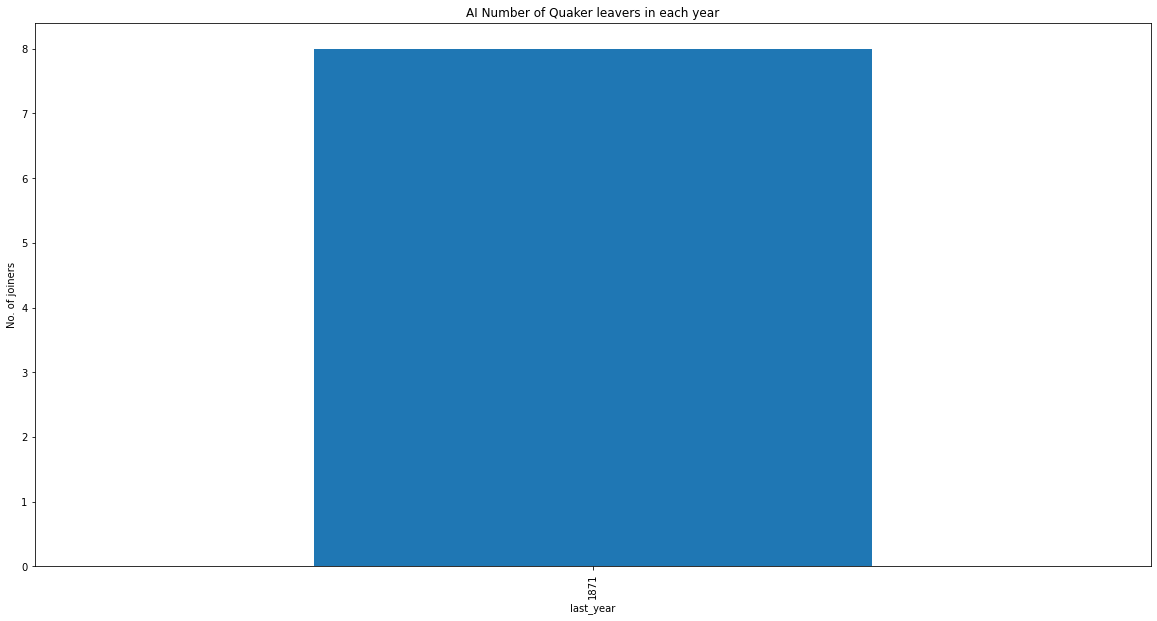

In [89]:
quaker_ai.groupby('last_year')['Name'].nunique().plot(kind='bar')
plt.title ("AI Number of Quaker leavers in each year")
plt.ylabel ("No. of joiners")
plt.show()

# END #